In [1]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
vis_stds = []
infrar_stds = []
#matplotlib inline

In [2]:
def equalize_hist(im, nbr_bins=256):
    """对一幅灰度图像进行直方图均衡化"""
    # 图像直方图统计
    imhist, bins = np.histogram(im.flatten(), nbr_bins)
    # 累积分布函数
    cdf = imhist.cumsum()
    cdf = 255.0 * cdf / cdf[-1]
    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(im.flatten(), bins[:-1], cdf)  # 分段线性插值函数
    return im2.reshape(im.shape), cdf

In [3]:
v = cv2.VideoCapture('C:\\Users\\DELL\\zuoye2\\v1.mp4')
if v.isOpened():
    open,frame = v.read()
else:
    open = False

In [4]:
frame.shape

(480, 960, 3)

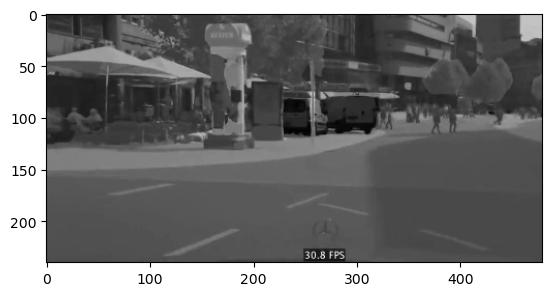

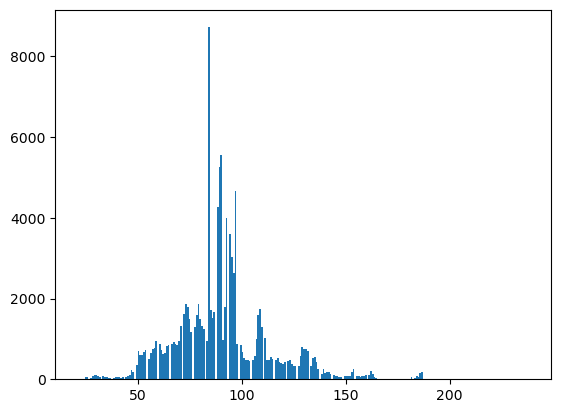

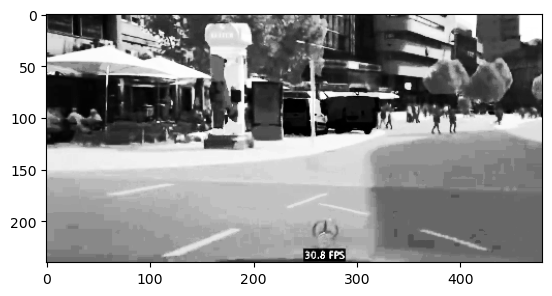

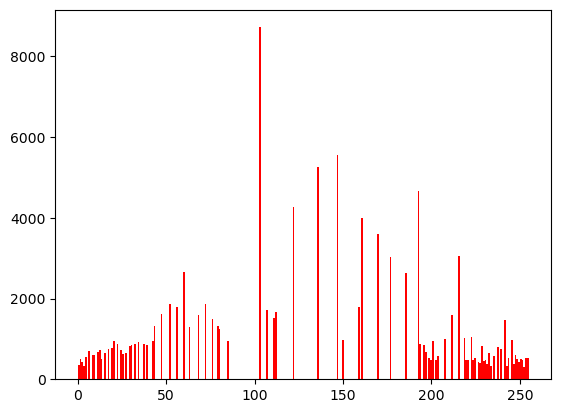

In [5]:
while open:
    re,frame = v.read()
    if frame is None:
        break
    if re==True:
        
        #将原始图像转化为灰度图像
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)    ###gray
        
        #将原始图像大小缩小为原来的1/4
        
        #frame = frame[500:800,500:800]                    ###box
        #frame = cv2.resize(frame,(800,400))               ###scale,(width,height)
        frame = cv2.resize(frame,(0,0),fx=0.5,fy=0.5) 
        
        image = frame
        
        

        # 图像均衡化
        img_equalize_hist, cdf = equalize_hist(frame)
        #img_equalize_hist = img_vis
       
        
        # 累积分布函数
        #plt.plot(cdf, color='r')
        
        cv2.imshow('result',frame)
     
        
        if cv2.waitKey(25) & 0xFF == 27:
            break
plt.imshow(image, 'gray')
plt.show()
# 统计原始图直方图
plt.hist(image.flatten(), 256)
plt.show()
plt.imshow(img_equalize_hist/255.0, 'gray')
plt.show()
# 显示均衡化图的直方图
plt.hist(img_equalize_hist.flatten(),256, color='r')
plt.show()
    
v.release()
cv2.destroyAllWindows()

#### 完成报告
![A%7D7U%7BJAIY_156@G1D0TOABD.png](attachment:A%7D7U%7BJAIY_156@G1D0TOABD.png)


In [ ]:
#### C++与Python在OpenCV调用上的异同
一.俩者调用逻辑相同，使用数据结构不同
二.Python和C++的OpenCV接口几乎一样，不同的是用C++的话，矩阵用的是cv::Mat，Python里面用的是numpy.array，用法和接口都不一样，但文档丰富，使用也非常方便，原理也相似。
三.二者本质上调用的都是OpenCV官方发布的库，所以在效率基础上是没有区别的，相当于核心部分都是C++的效率。
四.c++的效率一般会高于python。
五.对于具有同样作用的函数的不同调用方法。
六.python中对于变量的类型是不需要声明的。
七.python中函数参数可以为array形式。